Part 1. Linear regression with one variable

In [1]:
from google.colab import files
uploaded = files.upload()

Saving food_truck_data.txt to food_truck_data.txt


In [2]:
import numpy as np

p1_file_name = 'food_truck_data.txt'
p1_data = np.loadtxt(p1_file_name, delimiter=',')

p1_data_x = p1_data[:, 0].reshape(-1, 1)
p1_data_y = p1_data[:, 1].reshape(-1, 1)

p1_data_x = (p1_data_x - np.min(p1_data_x)) / (np.max(p1_data_x) - np.min(p1_data_x))
p1_data_x_with_coefficients = np.hstack((np.ones_like(p1_data_x), p1_data_x))

**Define a linear model to the data:** y = wx + b. y is the profit of a food truck. x is the population of the city. We would like to fit w, the weight or coefficient for x, and b, the bias or y-intercept of the model.

**Explain the model I defined:** The code defines a linear regression model using gradient descent for optimization. The model aims to predict the profit of a food truck based on the population of a city. The input parameters are w (weights, a (2, ) array), x (population of a city), and y (profit of a food truck in that city). The output is the gradient of the cost function and the cost itself. The gradient descent runs in a loop, continuously updating the weights (w) by subtracting a fraction (alpha) of the gradient. It keeps track of the weights and error at each iteration. The process continues until the change in weights is smaller than the tolerance, indicating convergence.

In [3]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.sum(np.power(error, 2)) / len(p1_data_x)

In [4]:
w = np.random.randn(2)
alpha = 0.5
tolerance = 1e-5

# Arrays to keep track of weights and errors
p1_weights_history = []
p1_errors = []

# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, p1_data_x_with_coefficients, p1_data_y)
    new_w = w - alpha * gradient

    # Log the weights and error
    p1_weights_history.append(new_w)
    p1_errors.append(error)

    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
      print("Converged.")
      print(f"w should be set to {new_w[1]}, and b should be set to {new_w[0]}.")
      break

    # Print error every 50 iterations
    if iterations % 100 == 0:
      print(f"Iteration: {iterations} - Error: {error:.4f}")

    iterations += 1
    w = new_w

Iteration: 100 - Error: 9.0975
Iteration: 200 - Error: 8.9550
Iteration: 300 - Error: 8.9540
Iteration: 400 - Error: 8.9539
Converged.
w should be set to 20.49133033665754, and b should be set to 2.1015441378892796.


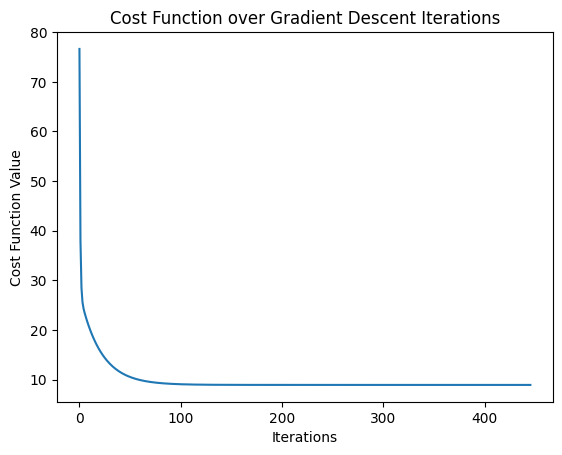

In [5]:
import matplotlib.pyplot as plt

# Plotting the cost function
plt.plot(p1_errors)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function over Gradient Descent Iterations')
plt.show()

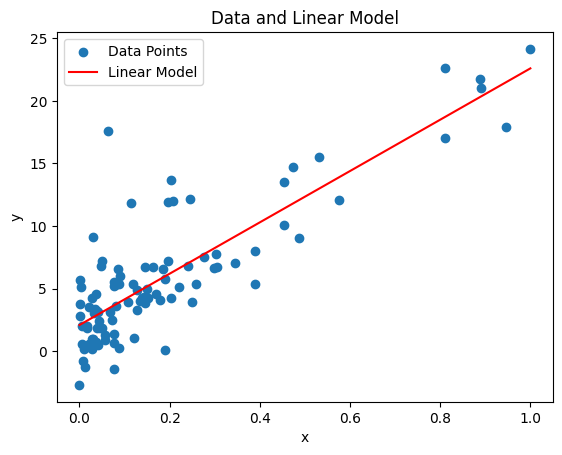

In [6]:
# Plot the data points
plt.scatter(p1_data_x, p1_data_y, label='Data Points')

# Generate a range of x values for plotting the line
x_model = np.linspace(p1_data_x.min(), p1_data_x.max(), 100)
# Compute the corresponding y values from the model
y_model = w[0] + w[1] * x_model

# Plot the linear model
plt.plot(x_model, y_model, color='red', label='Linear Model')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Linear Model')
plt.legend()

# Show the plot
plt.show()


Part 2. Linear regression with multiple variables

In [7]:
from google.colab import files
uploaded = files.upload()

Saving housing_price_data.txt to housing_price_data.txt


In [8]:
import numpy as np

p2_file_name = 'housing_price_data.txt'
p2_data = np.loadtxt(p2_file_name, delimiter=',')

p2_data_x1 = p2_data[:, 0].reshape(-1, 1)
p2_data_x2 = p2_data[:, 1].reshape(-1, 1)
p2_data_y = p2_data[:, 2].reshape(-1, 1)

p2_data_x1 = (p2_data_x1 - np.min(p2_data_x1)) / (np.max(p2_data_x1) - np.min(p2_data_x1))
p2_data_x2 = (p2_data_x2 - np.min(p2_data_x2)) / (np.max(p2_data_x2) - np.min(p2_data_x2))

ones_column = np.ones((p2_data_x1.shape[0], 1))
p2_train_x = np.hstack((ones_column, p2_data_x1, p2_data_x2))

**Define a linear model to the data:** Let x1 be size of the house. Let x2 be number of bedrooms. Let y represents price of the house. Let θ0 be the intercept, θ1 be the coefficient for house size, and θ2 be the coefficient for the number of bedrooms. Then the hypothesis function for the linear model is h(x) = θ0 + θ1 * x1 + θ2 * x2.

**Explain the model I defined:** In this model, you're using linear regression with multiple variables (house size, number of bedrooms) to predict house prices. The parameters (weights) are initialized randomly and updated using gradient descent. Feature scaling is applied to normalize data ranges, ensuring efficient convergence. During gradient descent, weights are iteratively adjusted based on the learning rate and gradient of the error function. Convergence is checked against a tolerance level. The process logs weights and errors for analysis. Once converged, the final weights indicate the model's parameters for predicting housing prices based on the input features.

In [9]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.sum(np.power(error, 2)) / len(x)

In [12]:
# Initialize weights and other parameters
w = np.random.randn(3)
alpha = 0.5
tolerance = 1e-5

# Arrays to keep track of weights and errors
p2_weights_history = []
p2_errors = []

# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, p2_train_x, p2_data_y)
    new_w = w - alpha * gradient

    # Log the weights and error
    p2_weights_history.append(new_w)
    p2_errors.append(error)

    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print("Converged.")
        print(f"w1 should be set to {new_w[1]}, w2 should be set to {new_w[2]}, and b should be set to {new_w[0]}.")
        break

    # Print error every 100 iterations
    if iterations % 100 == 0:
        print(f"Iteration: {iterations} - Error: {error:.4f}")

    iterations += 1
    w = new_w

Iteration: 100 - Error: 4524484602.2554
Iteration: 200 - Error: 4163793113.2258
Iteration: 300 - Error: 4101108748.6965
Iteration: 400 - Error: 4089307794.1162
Iteration: 500 - Error: 4087079088.2413
Iteration: 600 - Error: 4086658128.3713
Iteration: 700 - Error: 4086578616.7483
Iteration: 800 - Error: 4086563598.4538
Iteration: 900 - Error: 4086560761.7720
Iteration: 1000 - Error: 4086560225.9746
Iteration: 1100 - Error: 4086560124.7722
Iteration: 1200 - Error: 4086560105.6570
Iteration: 1300 - Error: 4086560102.0464
Iteration: 1400 - Error: 4086560101.3645
Iteration: 1500 - Error: 4086560101.2357
Iteration: 1600 - Error: 4086560101.2113
Iteration: 1700 - Error: 4086560101.2067
Iteration: 1800 - Error: 4086560101.2059
Iteration: 1900 - Error: 4086560101.2057
Iteration: 2000 - Error: 4086560101.2057
Iteration: 2100 - Error: 4086560101.2057
Iteration: 2200 - Error: 4086560101.2057
Iteration: 2300 - Error: 4086560101.2057
Converged.
w1 should be set to 504777.9035782633, w2 should be set

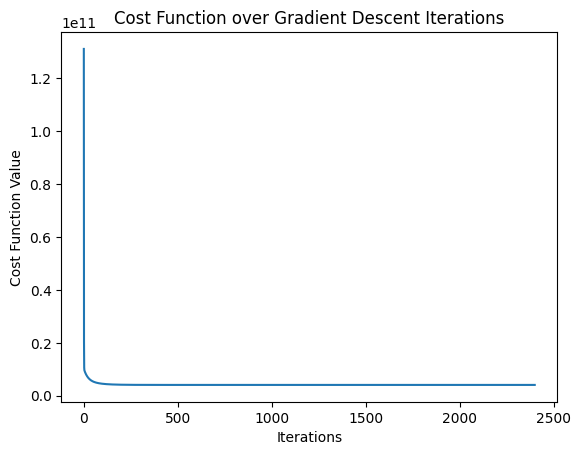

In [13]:
import matplotlib.pyplot as plt

# Plotting the cost function
plt.plot(p2_errors)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function over Gradient Descent Iterations')
plt.show()